In [1]:
import pandas as pd

# Load the dataset from uploaded file
df = pd.read_csv('/content/googleplaystore.csv')

# Display first 5 rows
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [2]:
# Show basic info to understand data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
# Drop rows with any missing values (quick method)
df_clean = df.dropna()

# Check new shape
print("After dropping NA:", df_clean.shape)


After dropping NA: (9360, 13)


In [4]:
# Remove '+' and ',' from 'Installs' and convert to int
df_clean['Installs'] = df_clean['Installs'].str.replace('+', '', regex=False)
df_clean['Installs'] = df_clean['Installs'].str.replace(',', '', regex=False)
df_clean['Installs'] = pd.to_numeric(df_clean['Installs'], errors='coerce')

# Convert 'Price' column to numeric (remove $)
df_clean['Price'] = df_clean['Price'].str.replace('$', '', regex=False)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')


<ipython-input-4-04bedc6df6b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Installs'] = df_clean['Installs'].str.replace('+', '', regex=False)
<ipython-input-4-04bedc6df6b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Installs'] = df_clean['Installs'].str.replace(',', '', regex=False)
<ipython-input-4-04bedc6df6b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [5]:
# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Drop irrelevant columns (like App ID if needed)
# Example: Let's drop 'Last Updated', 'Current Ver', 'Android Ver'
df_clean = df_clean.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'], errors='ignore')

# Final check
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 763.6+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


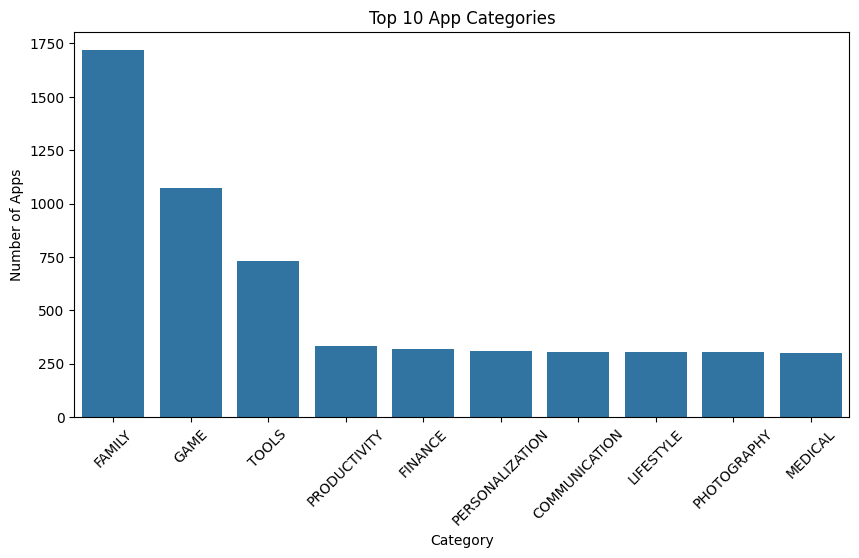

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each category
top_categories = df_clean['Category'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 10 App Categories")
plt.xticks(rotation=45)
plt.ylabel("Number of Apps")
plt.show()


In [7]:
# Most reviewed apps
top_reviewed = df_clean.sort_values(by='Reviews', ascending=False)[['App', 'Reviews']].head(5)
print("Top 5 Most Reviewed Apps:")
print(top_reviewed)

# Most installed apps
top_installed = df_clean.sort_values(by='Installs', ascending=False)[['App', 'Installs']].head(5)
print("\nTop 5 Most Installed Apps:")
print(top_installed)


Top 5 Most Reviewed Apps:
                                    App Reviews
2989             GollerCepte Live Score    9992
4970       Ad Block REMOVER - NEED ROOT     999
2705                SnipSnap Coupon App    9975
3229                         DreamTrips    9971
3049  US Open Tennis Championships 2018    9971

Top 5 Most Installed Apps:
                                App    Installs
3232             Google Street View  1000000000
3223      Maps - Navigate & Explore  1000000000
9844                    Google News  1000000000
386                        Hangouts  1000000000
391   Skype - free IM & video calls  1000000000



Average Rating (Free vs Paid):
Type
Free    4.182514
Paid    4.261702
Name: Rating, dtype: float64


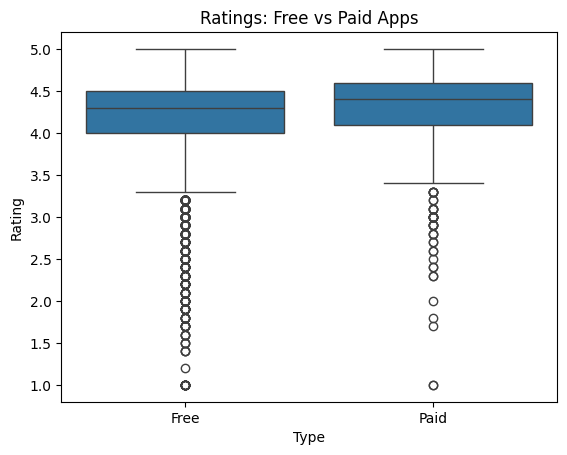

In [8]:
# Compare average rating of Free vs Paid apps
avg_rating = df_clean.groupby('Type')['Rating'].mean()
print("\nAverage Rating (Free vs Paid):")
print(avg_rating)

# Optional: Visual plot
sns.boxplot(x='Type', y='Rating', data=df_clean)
plt.title("Ratings: Free vs Paid Apps")
plt.show()


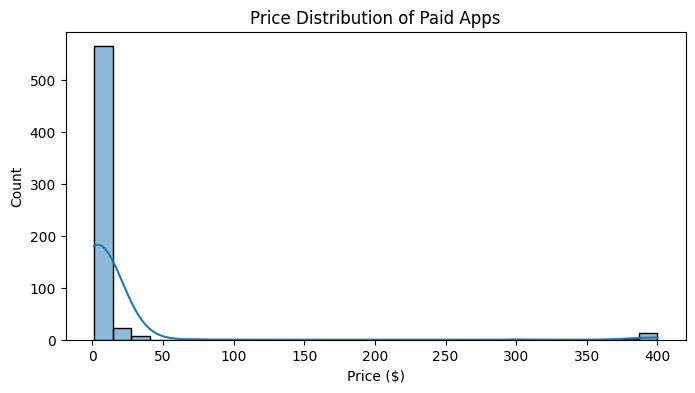

In [9]:
# Filter only paid apps
paid_apps = df_clean[df_clean['Type'] == 'Paid']

# Histogram of prices
plt.figure(figsize=(8,4))
sns.histplot(paid_apps['Price'], bins=30, kde=True)
plt.title("Price Distribution of Paid Apps")
plt.xlabel("Price ($)")
plt.show()


In [10]:
top_10_installed = df_clean.sort_values(by='Installs', ascending=False)[['App', 'Installs']].head(10)
print("\nTop 10 Most Installed Apps:")
print(top_10_installed)



Top 10 Most Installed Apps:
                                App    Installs
3232             Google Street View  1000000000
3223      Maps - Navigate & Explore  1000000000
9844                    Google News  1000000000
386                        Hangouts  1000000000
391   Skype - free IM & video calls  1000000000
3117      Maps - Navigate & Explore  1000000000
1654                 Subway Surfers  1000000000
4098      Maps - Navigate & Explore  1000000000
411    Google Chrome: Fast & Secure  1000000000
3687        Google Play Movies & TV  1000000000


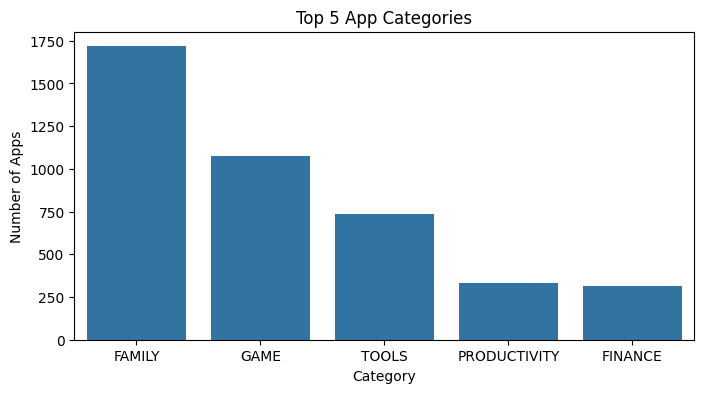

In [11]:
# Bar chart for top 5 categories
top_5_cat = df_clean['Category'].value_counts().head(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_5_cat.index, y=top_5_cat.values)
plt.title("Top 5 App Categories")
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.show()


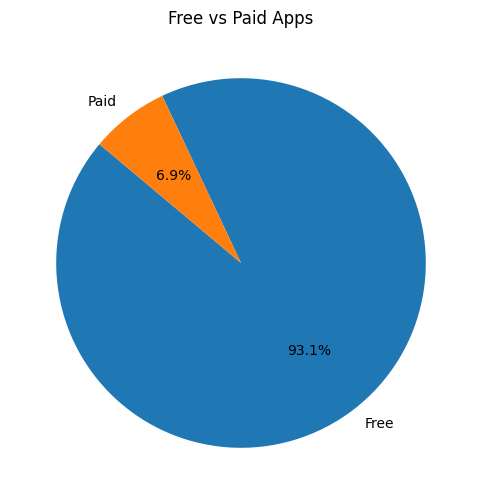

In [12]:
type_counts = df_clean['Type'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Free vs Paid Apps")
plt.show()


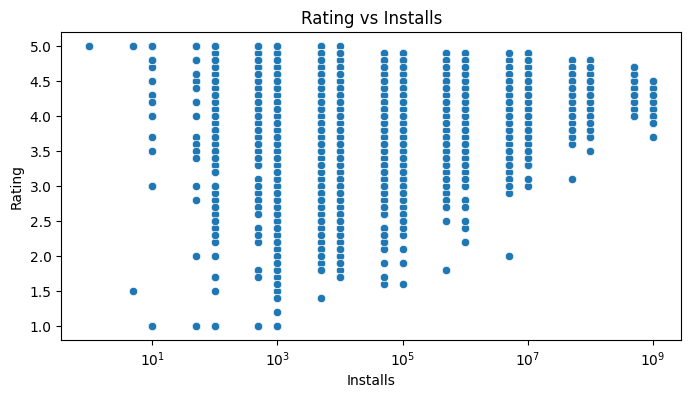

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Installs', y='Rating', data=df_clean)
plt.title("Rating vs Installs")
plt.xlabel("Installs")
plt.ylabel("Rating")
plt.xscale('log')  # Log scale helps visibility
plt.show()


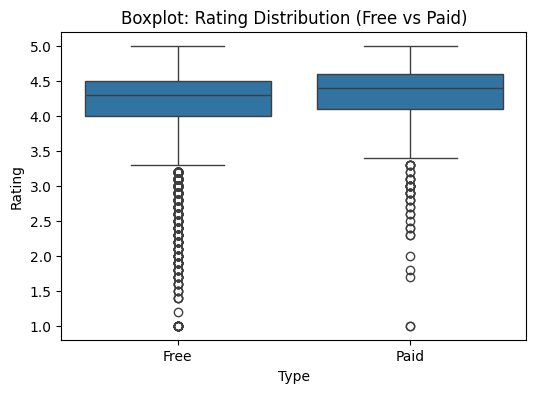

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Rating', data=df_clean)
plt.title("Boxplot: Rating Distribution (Free vs Paid)")
plt.show()


In [15]:
print("""
📌 Insights:
- Most apps are in the FAMILY and GAME categories.
- Free apps dominate the Play Store (~90%).
- Paid apps tend to have slightly higher average ratings.
- Price distribution is skewed — most paid apps are under $10.
- Top installed apps are mostly free and come from big tech companies.
""")



📌 Insights:
- Most apps are in the FAMILY and GAME categories.
- Free apps dominate the Play Store (~90%).
- Paid apps tend to have slightly higher average ratings.
- Price distribution is skewed — most paid apps are under $10.
- Top installed apps are mostly free and come from big tech companies.

